# Capstone 2 Project: HR Dataset 
<p> Dataset: https://www.kaggle.com/rhuebner/human-resources-data-set![image.png](attachment:image.png) </p>
Dataset description: https://rpubs.com/rhuebner/hr_codebook_v14 
<p> This Jupyter notebook details steps I took to manipulate the dataset to attain the "Attrition rate (%) over the years" graph. </p>

## Part I: Data Exploration 
        
<b> Step 1: Import Libraries </b>

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md 
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import datetime as dt

<b> Step 2: Import CSV file </b> 

<p> Check contents of the file using info() and describe(). </p>

In [3]:
hrdataset = pd.read_csv('HRDataset_v14.csv', parse_dates=True)
print(hrdataset)
hrdataset.info()
hrdataset.describe()

                Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


### Part II: Data Cleansing/ Data Preparation 

<b> To calculate Attrition: </b>
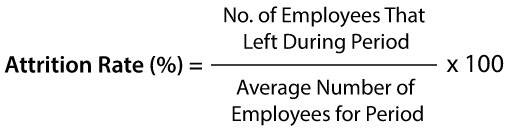


<b> Step 1: Find out how many employees are there within each year: 2006 to 2018. </b>

1. Convert columns into Date time values and print head() 

In [4]:
hrdataset['DateofHire'] =  pd.to_datetime(hrdataset['DateofHire'])
hrdataset['DateofTermination'] = pd.to_datetime(hrdataset['DateofTermination'])

print(hrdataset.head())


              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

2. Extract columns 'DateofHire' and 'DateofTermination' from hrdataset 
3. Extract only the year variable from each of those columns 
4. Count the number of employees with respect to 'hireyear' and assign it to df1 

In [5]:
hr_subset = hrdataset[['DateofHire', 'DateofTermination']]

hr_subset['hireyear'] = hr_subset['DateofHire'].astype(str).str[0:4]
hr_subset
hr_subset['terminationyear'] = hr_subset['DateofTermination'].astype(str).str[0:4]
hr_subset

df1 = pd.DataFrame(hr_subset['hireyear'].value_counts())
df1 

<ipython-input-5-50a020af41e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_subset['hireyear'] = hr_subset['DateofHire'].astype(str).str[0:4]
<ipython-input-5-50a020af41e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_subset['terminationyear'] = hr_subset['DateofTermination'].astype(str).str[0:4]


,hireyear
2011,83
2014,60
2012,45
2013,44
2015,36
2016,14
2010,9
2009,7
2017,6
2008,3


5. Reset Index for df1 and rename columns. 

In [7]:
df1.reset_index(inplace=True)
df1.columns = ['Year','CountHires']
df1

,Year,CountHires
0,2011,83
1,2014,60
2,2012,45
3,2013,44
4,2015,36
5,2016,14
6,2010,9
7,2009,7
8,2017,6
9,2008,3


<b> Step 2: Find out how many employees left during each year: 2006 to 2018 </b>
        
1. Count the number of employees with respect to 'terminationyear' and assign it to df2
2. Rename columns of df2. 

In [9]:
df2 = pd.DataFrame(hr_subset['terminationyear'].value_counts())

#make Year appear as a column
df2.reset_index(inplace=True)
df2.columns = ['Year', 'terminationcount']
df2


,Year,terminationcount
0,NaT,207
1,2015,23
2,2016,22
3,2013,13
4,2014,13
5,2018,13
6,2017,8
7,2012,8
8,2011,3
9,2010,1


<b> Step 3: Calculate Attrition rate (%) for every year </b>

1. Merge df1 on df2 by outer join and rename it as test
2. If there are cells with NaN, fill it with 0 instead 
3. Create new columns which will help to calculate "Annual Attrition Rate" 
4. Present "Annual Attrition rate" in a separate column 
5. Drop last row (index 13) of the test to remove unnecessary values due to shift()

In [10]:
test = df1.merge(df2, on='Year', how='outer')

test.sort_values(by='Year', ascending=True, inplace=True)


test['terminationcount'].fillna(0, inplace=True)

test['withoutshift'] = test['CountHires']-test['terminationcount']

test['empsstartofyear'] = test['withoutshift'].cumsum().shift(1, axis = 0).fillna(0)

test.fillna(0)

test['empsendofyear'] = test['empsstartofyear']+test['CountHires']-test['terminationcount']


test['avgempsforperiod'] = (test['empsstartofyear'] + test['empsendofyear'])/2
test['annual_attrition_rate'] = (test['terminationcount']/test['avgempsforperiod'])*100


test.drop(test.tail(1).index,inplace=True) 
print(test)

    Year  CountHires  terminationcount  withoutshift  empsstartofyear  \
11  2006         1.0               0.0           1.0              0.0   
10  2007         2.0               0.0           2.0              1.0   
9   2008         3.0               0.0           3.0              3.0   
7   2009         7.0               0.0           7.0              6.0   
6   2010         9.0               1.0           8.0             13.0   
0   2011        83.0               3.0          80.0             21.0   
2   2012        45.0               8.0          37.0            101.0   
3   2013        44.0              13.0          31.0            138.0   
1   2014        60.0              13.0          47.0            169.0   
4   2015        36.0              23.0          13.0            216.0   
5   2016        14.0              22.0          -8.0            229.0   
8   2017         6.0               8.0          -2.0            221.0   
12  2018         1.0              13.0         -12.

<b> Step 4: Finalise table for Attrition rate (%) </b>

1. Copy test dataframe and drop column 'withoutcum'
2. Reset index after sorting the Year column 

In [11]:
attrition_rate = test.copy()
print(attrition_rate)

attrition_rate.drop(columns=['withoutshift']).reset_index(drop=True)

    Year  CountHires  terminationcount  withoutshift  empsstartofyear  \
11  2006         1.0               0.0           1.0              0.0   
10  2007         2.0               0.0           2.0              1.0   
9   2008         3.0               0.0           3.0              3.0   
7   2009         7.0               0.0           7.0              6.0   
6   2010         9.0               1.0           8.0             13.0   
0   2011        83.0               3.0          80.0             21.0   
2   2012        45.0               8.0          37.0            101.0   
3   2013        44.0              13.0          31.0            138.0   
1   2014        60.0              13.0          47.0            169.0   
4   2015        36.0              23.0          13.0            216.0   
5   2016        14.0              22.0          -8.0            229.0   
8   2017         6.0               8.0          -2.0            221.0   
12  2018         1.0              13.0         -12.

,Year,CountHires,terminationcount,empsstartofyear,empsendofyear,avgempsforperiod,annual_attrition_rate
0,2006,1.0,0.0,0.0,1.0,0.5,0.000000
1,2007,2.0,0.0,1.0,3.0,2.0,0.000000
2,2008,3.0,0.0,3.0,6.0,4.5,0.000000
3,2009,7.0,0.0,6.0,13.0,9.5,0.000000
4,2010,9.0,1.0,13.0,21.0,17.0,5.882353
5,2011,83.0,3.0,21.0,101.0,61.0,4.918033
6,2012,45.0,8.0,101.0,138.0,119.5,6.694561
7,2013,44.0,13.0,138.0,169.0,153.5,8.469055
8,2014,60.0,13.0,169.0,216.0,192.5,6.753247
9,2015,36.0,23.0,216.0,229.0,222.5,10.337079


<b> Step 6: Plot Attrition rate (%) in a line graph using matplotlib </b>

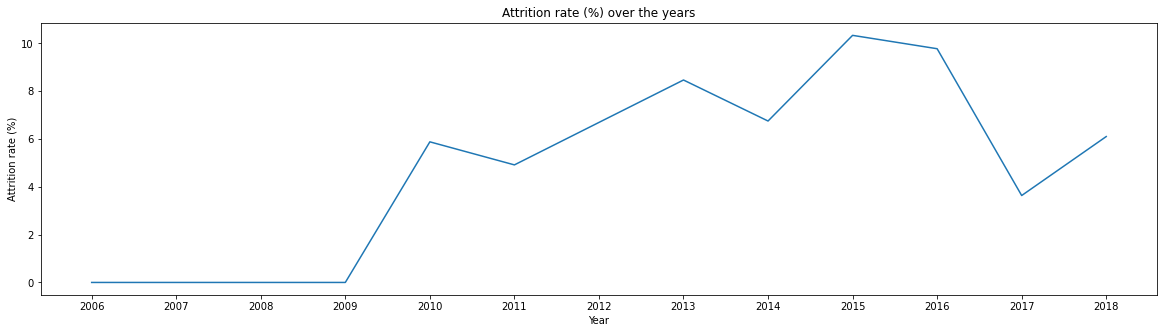

In [13]:
x = attrition_rate['Year']
y = attrition_rate['annual_attrition_rate']

plt.figure(figsize=(20,5))
plt.plot(x, y)
plt.title('Attrition rate (%) over the years')
plt.xlabel('Year')
plt.ylabel('Attrition rate (%)')

plt.savefig('Attrition_rateplot.png', bbox_inches='tight')
plt.show()


Insights: 
* Attrition rate has gradually increased over the years, peaking in 2015 
* Company started out with 1 employee in 2006 and ended with 207 employees in 2018 which explains that attrition rate is expected due to increase in workforce numbers 
* Company should access the attrition rate against that of it's industry to see if this area is a cause of concern. 